In [1]:
from skimage import io, filters, measure
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

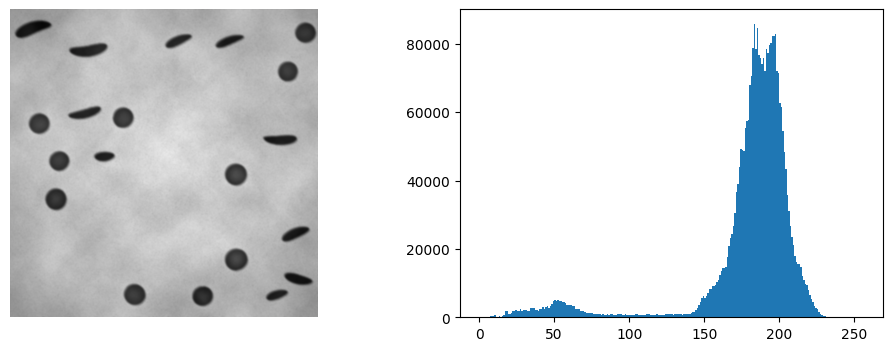

In [2]:
blood = io.imread('blood_ezm.png')

_,ax = plt.subplots(1,2, figsize=(12,4))
ax[0].imshow(blood)
ax[0].axis('off')
ax[1].hist(blood.flatten(), 256, range=(0,256))
plt.show()

On observe 2 classes de fréquences dans l'histogramme. On peut donc réaliser un thresholding

1. Propose a method and code a function that turns the grayscale image
into a binary image in order to isolate every blood cell visible on the image.

C:\Users\Minh-Hoang\AppData\Local\Temp\ipykernel_17048\3829977700.py:1: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (1015, 1015, 3) looks like that of an RGB image.
  blood_th = np.where(blood > filters.threshold_otsu(blood), 0, 255)


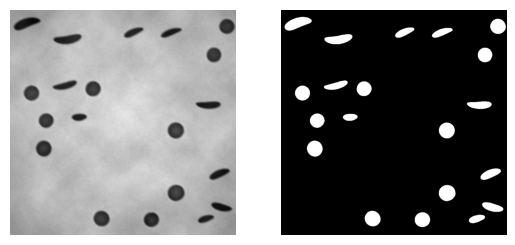

In [3]:
blood_th = np.where(blood > filters.threshold_otsu(blood), 0, 255)
_, ax = plt.subplots(1,2)
for a in ax:
    a.axis('off')

ax[0].imshow(blood)
ax[1].imshow(blood_th, cmap='gray')

2. Propose a method and code a function that returns the number of cells.

In [4]:
measure.label(blood_th, return_num=True)[1]

20

3.In this questions, we want to gather information about the individual cells. For every cell, we want to know its perimeter, area and circularity.

In [5]:
table_props = pd.DataFrame({'Perimeter':[], 'Area':[], 'Circularity':[]})

blood_labels = measure.label(blood_th)[:,:,0]
props = measure.regionprops(blood_labels)
for i, p in enumerate(props):
    circle_perimeter = 2*np.pi*np.sqrt(p.area/np.pi)
    circularity = circle_perimeter/p.perimeter
    table_props.loc[i] = [p.perimeter, p.area, circularity]

In [6]:
len(table_props[table_props['Circularity'] > 0.9])

10

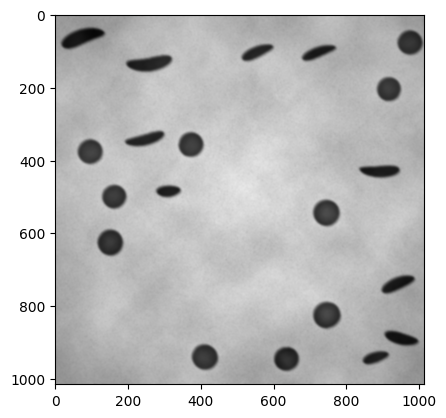

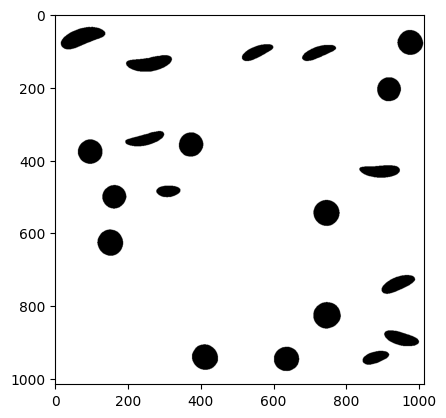

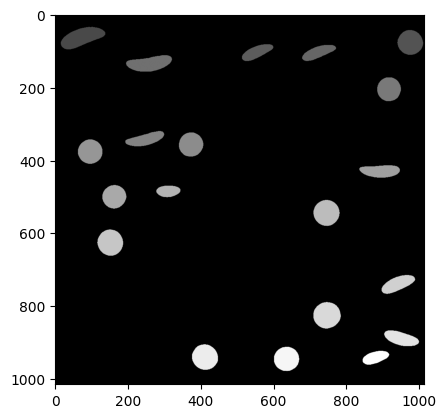

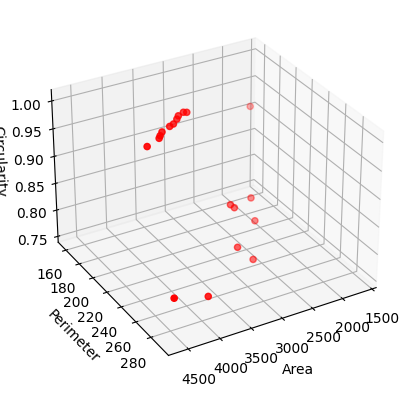

Cellule saine: 10
Cellule malade: 9


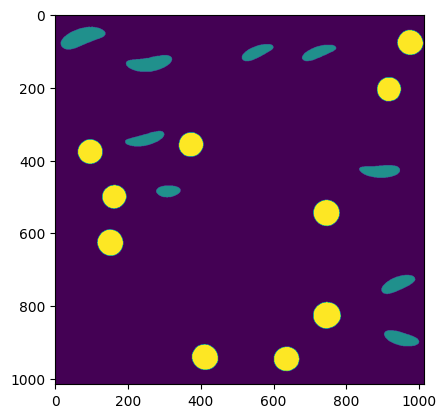

In [7]:
# Commented out IPython magic to ensure Python compatibility.
import cv2         
# %matplotlib inline               
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# from google.colab.patches import cv2_imshow

from skimage.measure import label, perimeter_crofton
from skimage.morphology import binary_closing, binary_opening
from skimage.morphology import disk

image1 = cv2.imread('blood_ezm.png')
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

ret, IMG = cv2.threshold(img, 255, 255, cv2.THRESH_OTSU)     
plt.imshow(image1) 
plt.show()
plt.imshow(IMG,'gray') 
plt.show()

LABEL = label(255-IMG)
plt.imshow(3*255*LABEL/np.max(LABEL)/4 + (255-IMG)/4,'gray') 
np.max(LABEL)

N = np.max(LABEL)
data = np.zeros((N-1,3))
for k in range(1,N):
    data[k-1,0] = np.sum(LABEL == k)
    data[k-1,1] = perimeter_crofton(LABEL == k, directions=4)
    data[k-1,2] = 2*np.pi*np.sqrt(data[k-1,0]/np.pi)/data[k-1,1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = data[:,0]
y = data[:,1]
z = data[:,2]
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Circularity')
ax.view_init(elev=30, azim=60)
plt.show()

R = np.zeros(LABEL.shape)
for k in range(1,N):
    if data[k-1,2] > .95:
        R = R + (LABEL == k)*2
    else:
        R = R + (LABEL == k)
plt.imshow(R)

print('Cellule saine:',np.sum(data[:,2] > .95))
print('Cellule malade:',np.sum(data[:,2] <= .95))


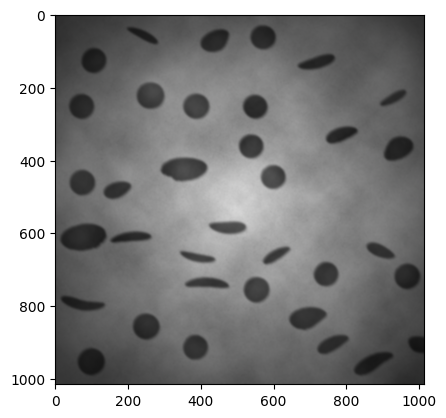

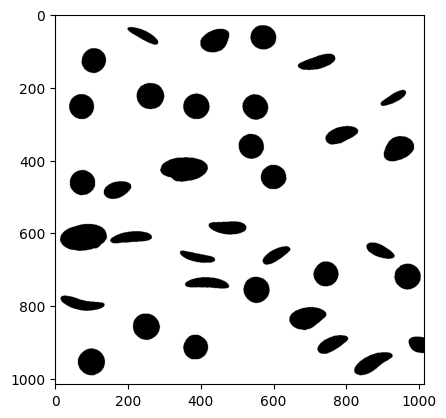

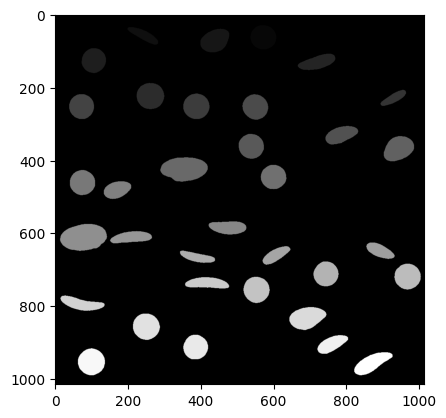

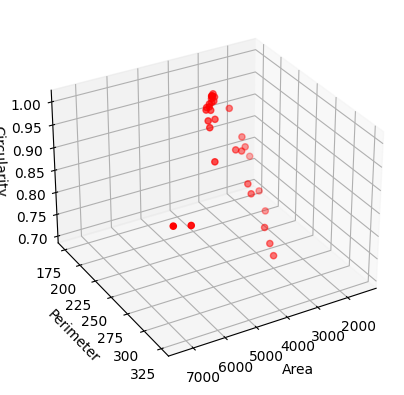

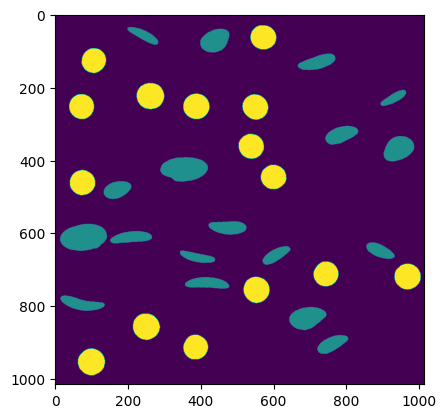

Cellule saine: 15
Cellule malade: 18


In [8]:
image1 = cv2.imread('blood_hm.png')
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
IMG = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,255,20) 

LABEL = label(255-IMG)
h1 = np.unique(LABEL[:,0])
for k in h1:
  if k > 0:
    LABEL[LABEL==k] = 0
h1 = np.unique(LABEL[:,-1])
for k in h1:
  if k > 0:
    LABEL[LABEL==k] = 0
h1 = np.unique(LABEL[0,:])
for k in h1:
  if k > 0:
    LABEL[LABEL==k] = 0
h1 = np.unique(LABEL[-1,:])
for k in h1:
  if k > 0:
    LABEL[LABEL==k] = 0

LABEL = label(LABEL > 0)

N = np.max(LABEL)
data = np.zeros((N-1,3))
for k in range(1,N):
    data[k-1,0] = np.sum(LABEL == k)
    data[k-1,1] = perimeter_crofton(LABEL == k, directions=16)
    data[k-1,2] = 2*np.pi*np.sqrt(data[k-1,0]/np.pi)/data[k-1,1]

R = np.zeros(LABEL.shape)
for k in range(1,N):
    if data[k-1,2] > .98:
        R = R + (LABEL == k)*2
    else:
        R = R + (LABEL == k)


plt.imshow(image1,'gray') 
plt.show()
plt.imshow(IMG,'gray') 
plt.show()
plt.imshow(3*255*LABEL/np.max(LABEL)/4 + (255-IMG*(LABEL>0))/4,'gray') 
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = data[:,0]
y = data[:,1]
z = data[:,2]
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Circularity')
ax.view_init(elev=30, azim=60)
plt.show()

plt.imshow(R)
plt.show()


print('Cellule saine:',np.sum(data[:,2] > .98))
print('Cellule malade:',np.sum(data[:,2] <= .98))

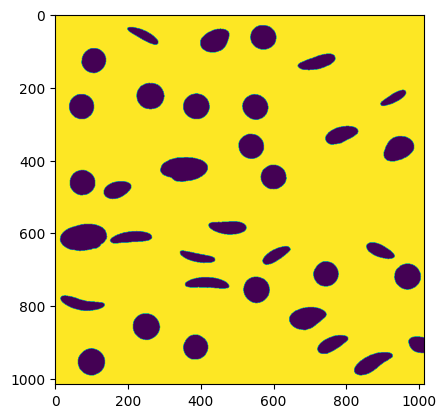

In [9]:
image1 = cv2.imread('blood_hm.png')
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
IMG = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,255,20) 

plt.imshow(IMG)
plt.show()